In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #easy plotting: subpackage of seaborn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Part 1: Plotting the ROC curve

We work with the same Default dataset as the previous session.

1. Run the code below to get back to the same spot as last session: i.e., with X and Y defined at the end.

In [10]:
#please import dataset on Google Colab
Default=pd.read_csv("Default.csv")
Default=pd.get_dummies(Default,drop_first=True,columns=["default","student"])
Y=Default["default_Yes"]
X=Default.drop(columns=["default_Yes","income"])

2. Use `train_test_split` twice to divide `X` and `Y` into three sets: training (50%), test(25%), validation (25%). You should get `Xtrain,ytrain` and `Xval, yval` and `Xtest, ytest` with appropriate sizes.

In [66]:
Xtrain, Xother, ytrain, yother= train_test_split(X,Y, test_size=0.5)

In [67]:
Xval, Xtest, yval, ytest=train_test_split(Xother,yother, test_size=0.5)

In [68]:
print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(5000, 2)
(2500, 2)
(2500, 2)


3. Fit a logistic regression model to `Xtrain, ytrain` as done in the last session.

In [69]:
logm = LogisticRegression().fit(Xtrain,ytrain)

4. Predict the **probability of defaulting** for the validation set. Call this `y_pred`. 

In [71]:
y_pred = logm.predict_proba(Xval)[:,1:2]

5. Run the following code. What do you think roccurve is giving you? How would you use this to obtain the curve seen in class?

In [72]:
roccurve=metrics.roc_curve(yval,y_pred)
roccurve

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.14593698e-04,
        4.14593698e-04, 8.29187396e-04, 8.29187396e-04, 1.24378109e-03,
        1.24378109e-03, 1.65837479e-03, 1.65837479e-03, 2.48756219e-03,
        2.48756219e-03, 2.90215589e-03, 2.90215589e-03, 3.31674959e-03,
        3.31674959e-03, 3.73134328e-03, 3.73134328e-03, 4.14593698e-03,
        4.14593698e-03, 4.56053068e-03, 4.56053068e-03, 5.80431177e-03,
        5.80431177e-03, 6.21890547e-03, 6.21890547e-03, 7.46268657e-03,
        7.46268657e-03, 7.87728027e-03, 7.87728027e-03, 1.03648425e-02,
        1.03648425e-02, 1.16086235e-02, 1.16086235e-02, 1.20232172e-02,
        1.20232172e-02, 1.28524046e-02, 1.28524046e-02, 1.78275290e-02,
        1.78275290e-02, 1.94859038e-02, 1.94859038e-02, 2.03150912e-02,
        2.03150912e-02, 2.40464345e-02, 2.40464345e-02, 2.52902156e-02,
        2.52902156e-02, 2.57048093e-02, 2.57048093e-02, 3.48258706e-02,
        3.48258706e-02, 3.73134328e-02, 3.73134328e-02, 3.897180

6. Use `plt.plot` to recover the ROC curve.

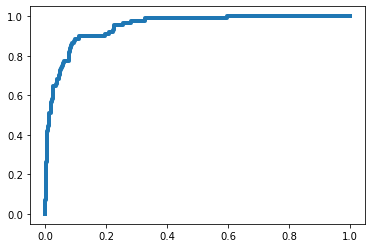

In [73]:
plt.plot(roccurve[0], roccurve[1], linewidth=4)

# Part 2: The ROC, the threshold, and the supervised machine learning pipeline

1. Use `roccurve` above to pick your favorite threshold bearing in mind that we are okay with 1-specificity being larger than 0, but we would like sensitivity to be close to 1.

In [50]:
((roccurve[0]<=0.3) & (roccurve[0]>=0.2)) & (roccurve[1]>=0.9)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [51]:
roccurve[1][((roccurve[0]<=0.3) & (roccurve[0]>=0.2)) & (roccurve[1]>=0.9)]

array([0.93243243, 0.94594595])

In [52]:
roccurve[2][((roccurve[0]<=0.3) & (roccurve[0]>=0.2)) & (roccurve[1]>=0.9)]

array([0.01524048, 0.0152376 ])

In [53]:
roccurve[0][((roccurve[0]<=0.3) & (roccurve[0]>=0.2)) & (roccurve[1]>=0.9)]

array([0.20115416, 0.20115416])

2. With the threshold you've picked, we're now going to work towards our final model. First, we concatenate our training sets and validation sets and retrain our model on these sets. Run the code below to do this.

In [54]:
Xtrain_val=pd.concat([Xtrain, Xval])
ytrain_val=pd.concat([ytrain, yval])

3. Retrain our model on `Xtrain_val` and `ytrain_val`.

In [55]:
logm = LogisticRegression().fit(Xtrain_val, ytrain_val)

4. We now evaluate the model on the test set. To do this, predict the probability of defaulting for observations in the test set. Obtain the corresponding labels by thresholding using the threshold you want (here, 0.018).

In [58]:
Default_prob=logm.predict_proba(Xtest)[:,1] #predictions of the probabilities on the test data
threshold=0.018
y_pred=np.where(Default_prob > threshold, 1, 0) #predict the classes for test data based on the threshold found via the validation data

5. Compute the confusion matrix and the accuracy score. Does this work for you?

In [57]:
confusion_matrix(ytest,y_pred)

array([[1960,  443],
       [   5,   92]], dtype=int64)

In [62]:
accuracy_score(ytest,y_pred)

0.8208

6. Compute the AUC by running the code below.

In [65]:
roc_auc_score(ytest, Default_prob)

0.9536447138671162

# Homework - Exercise 2

1. See lecture notes.

2. Suppose we were able to predict perfectly the labels: if the label is zero, we would predict zero. If the label is one, we would predict that the label is one. Thus, regardless of the threshold we pick between zero and one strictly, we would build a confusion matrix with no false positives and no false negatives. Because of this the true positive rate (the sensitivity) would be equal to one. The false positive rate (1-the specificity) would be equal to zero. On the ROC, this means that on top of the (0,0) point (corresponding to threshold 1) and the (1,1) point (corresponding to threshold 0), the only other point would be the point (0,1). This gives the first curve and an area under the curve equal to one. 

3. In this setting, we are not learning anything from the features, just randomly allocating labels to the data.

4. Suppose that we have a proportion $p$ of observations that have actual labels that are yes and a proportion $1-p$ that have labels that are no.

When faced with picking a label, we have a 50-50 chance. There will be $p/2$ "yes" observations that will be correctly classified and $p/2$ that are incorrectly classified, i.e., they are set to "no" when they are actually "yes": they are false negatives.

Likewise, there will be $(1-p)/2$ "no" observations that will be correctly classified and $(1-p)/2$ that will be incorrectly classified, i.e., that are set to "yes" when they are actually "no": these are false positives.

This gives rise to the confusion matrix:


|  | Predicted No | Predicted Yes |
| --- | --- | --- |
| Actual No | $(1-p)/2$ | $(1-p)/2$ |
| Actual Yes |  $p/2$ | $p/2$ |

From this we deduce the specificity:
$$specificity=\frac{(1-p)/2}{(1-p)/2+(1-p)/2}=\frac12$$
and the sensitivity:
$$sensitivity=\frac{p/2}{p/2+p/2}=\frac12.$$

As the point on the ROC curve is given by $(1-specificity, sensitivity)$, it follows that $(1/2,1/2)$ is on the curve.

Notice here that the threshold doesn't play a role: we are assigning observations to either "0" (no) or "1" (yes) immediately. 